# 1.将图像复制到训练、验证和测试的目录

In [1]:
import os, shutil

In [4]:
# 原始数据集解压目录的路径
original_dataset_dir = r'/data/dataset/dogs_cats/train'
# 保存较小数据集的目录
base_dir = r'/data/dataset/dogs_cats/cats_dogs_small_dataset/'

# 创建对应划分后的训练,验证和测试的目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫的训练,验证,测试图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
# 狗的训练,验证,测试图像目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张猫的图片复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
# 将接下来的500张猫的图片复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
# 接下来的500张猫的图片复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将前1000张狗的图片复制到train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
# 将接下来的500张狗的图片复制到validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
# 接下来的500张狗的图片复制到test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 验证小型数据集制作是否符合预期
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


# 2.构建网络

In [7]:
from keras import models
from keras import layers

net = models.Sequential()
net.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(64, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(128, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(128, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Flatten())
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(1, activation='sigmoid'))

net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

# 3.配置模型用于训练

In [9]:
from keras import optimizers
net.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4.数据预处理

In [11]:
# 使用ImageDataGenerator从目录中读取图片
from keras.preprocessing.image import ImageDataGenerator
# 将所有图片乘以1/255
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
[1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.]


In [ ]:
# python生成器
# 生成器是用yield运算符来构造的
# 启动生成器的时候,如果代码直行遇到yield,那么代码会暂停.
# 下次再启动生成器的时候,会在暂停的位置上继续直行.

# 5.利用批量生成器拟合模型

In [12]:
history = net.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/30
100/100 [==============================] - 18s 182ms/step - loss: 0.6915 - acc: 0.5240 - val_loss: 0.6703 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6602 - acc: 0.6030 - val_loss: 0.6540 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 5s 55ms/step - loss: 0.6173 - acc: 0.6625 - val_loss: 0.6317 - val_acc: 0.6170
Epoch 4/30
100/100 [==============================] - 5s 45ms/step - loss: 0.5670 - acc: 0.6990 - val_loss: 0.6002 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 4s 43ms/step - loss: 0.5369 - acc: 0.7190 - val_loss: 0.6319 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 4s 44ms/step - loss: 0.5098 - acc: 0.7515 - val_loss: 0.5757 - val_acc: 0.6880
Epoch 7/30
100/100 [==============================] - 4s 43ms/step - loss: 0.4813 - acc: 0.7710 - val_loss: 0.5637 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 4s 44ms/step 

# 6.保存模型

In [13]:
net.save('cats_and_dogs_small_1.h5')

# 7.绘制训练过程中的损失曲线和精度曲线

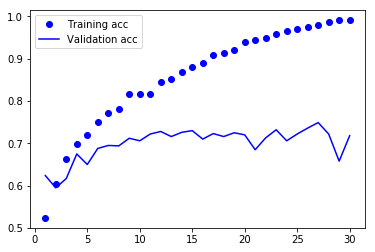

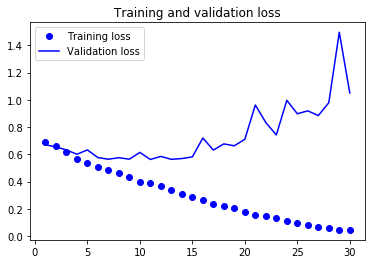

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 8.利用ImageDataGenerator来设置数据增强

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,  # 图像随机旋转的角度范围
    width_shift_range=0.2,  # 水平方向上平移的范围
    height_shift_range=0.2,  # 垂直方向上平移的范围
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 图像随机缩放的范围
    horizontal_flip=True,  # 随机将一般图像水平翻转
    fill_mode='nearest'  # 用于填充新创建像素的方法
)

# 9.显示几个随机增强后的训练图片

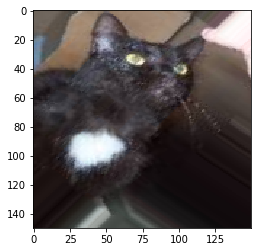

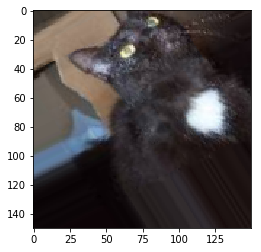

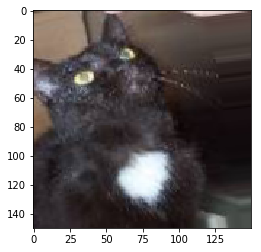

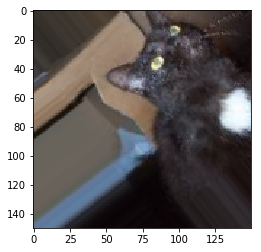

In [19]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
# 将其转换为形状为(150,150,3)的numpy数组
x = image.img_to_array(img)
# 将其形状改变为(1, 150, 150, 3)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

# 10.向模型中添加一个包含dropout层的新卷积神经网络

In [20]:
net = models.Sequential()
net.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(64, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(128, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Conv2D(128, (3, 3), activation='relu'))
net.add(layers.MaxPooling2D((2, 2)))
net.add(layers.Flatten())
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu'))
net.add(layers.Dense(1, activation='sigmoid'))

net.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

# 11.利用数据增强生成器训练卷积神经网络

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# 注意不能增强验证集数据
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = net.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)
net.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6919 - acc: 0.5309 - val_loss: 0.6809 - val_acc: 0.5197
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6802 - acc: 0.5697 - val_loss: 0.6689 - val_acc: 0.5947
Epoch 3/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6624 - acc: 0.5988 - val_loss: 0.6618 - val_acc: 0.5945
Epoch 4/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6477 - acc: 0.6215 - val_loss: 0.6211 - val_acc: 0.6424
Epoch 5/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6299 - acc: 0.6375 - val_loss: 0.6575 - val_acc: 0.5901
Epoch 6/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6197 - acc: 0.6519 - val_loss: 0.5862 - val_acc: 0.6785
Epoch 7/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6035 - acc: 0.6738 -

100/100 [==============================] - 16s 164ms/step - loss: 0.4056 - acc: 0.8156 - val_loss: 0.4492 - val_acc: 0.7817
Epoch 61/100
100/100 [==============================] - 17s 167ms/step - loss: 0.4136 - acc: 0.8075 - val_loss: 0.4476 - val_acc: 0.8041
Epoch 62/100
100/100 [==============================] - 16s 164ms/step - loss: 0.3998 - acc: 0.8194 - val_loss: 0.4438 - val_acc: 0.8058
Epoch 63/100
100/100 [==============================] - 17s 166ms/step - loss: 0.3885 - acc: 0.8297 - val_loss: 0.5794 - val_acc: 0.7468
Epoch 64/100
100/100 [==============================] - 16s 159ms/step - loss: 0.3950 - acc: 0.8247 - val_loss: 0.4317 - val_acc: 0.8099
Epoch 65/100
100/100 [==============================] - 16s 161ms/step - loss: 0.3930 - acc: 0.8253 - val_loss: 0.4498 - val_acc: 0.8071
Epoch 66/100
100/100 [==============================] - 16s 160ms/step - loss: 0.4114 - acc: 0.8200 - val_loss: 0.4360 - val_acc: 0.8196
Epoch 67/100
100/100 [==============================] 

In [23]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

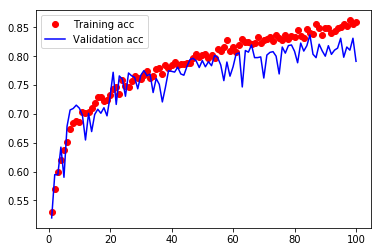

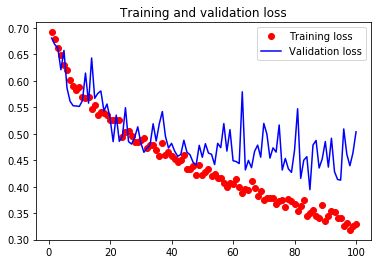

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
使用数据增强和dropout后,极大程度上缓解了过拟合,精度也有所提高.